<a href="https://colab.research.google.com/github/ronaldothame/DATAWAREHOUSE-DATALAKE/blob/main/Data_Lake_Data_Warehouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Importando a biblioteca pandas como pd e a biblioteca numpy como np
import pandas as pd
import numpy as np

# Definindo o número de produtos como 600
num_produtos = 600

# Criando um dicionário 'produtos' com detalhes do produto como ID, nome e categoria usando valores aleatórios e sequências
produtos = {
    'produto_id': range(1, num_produtos + 1),  # Altere 'produto id' para 'produto_id'
    'nome': ['Produto {}'.format(i) for i in range(1, num_produtos + 1)],
    'categoria': np.random.choice(['Eletrônicos', 'Roupas', 'Alimentos'], num_produtos)
}

# Convertendo o dicionário 'produtos' em um DataFrame pandas chamado 'df_produtos'
df_produtos = pd.DataFrame(produtos)

# Definindo o número de vendas como 1000
num_vendas = 1000

# Criando um dicionário 'data_vendas' com detalhes de vendas como data, ID do produto, quantidade e valor total usando valores aleatórios e sequências
data_vendas = {
    'data': np.random.choice(pd.date_range('2024-04-01', periods=30), num_vendas),
    'produto_id': np.random.randint(1, num_produtos + 1, num_vendas),
    'quantidade': np.random.randint(50, 200, num_vendas),
    'valor_total': np.random.randint(1000, 10000, num_vendas)
}

# Criando um DataFrame a partir dos dados existentes (data_vendas) usando a biblioteca pandas
df_vendas = pd.DataFrame(data_vendas)

# Salvando o DataFrame df_vendas em um arquivo CSV chamado 'vendas.csv' sem índice
df_vendas.to_csv('vendas.csv', index=False)

# Salvando outro DataFrame (presumivelmente definido anteriormente) df_produtos em um arquivo CSV chamado 'produtos.csv' sem índice
df_produtos.to_csv('produtos.csv', index=False)

# Lendo o arquivo 'vendas.csv' em um DataFrame df_vendas
df_vendas = pd.read_csv('vendas.csv')

# Lendo o arquivo 'produtos.csv' em um DataFrame df_produtos
df_produtos = pd.read_csv('produtos.csv')

# Mesclando os DataFrames df_vendas e df_produtos na coluna 'produto_id' usando o método de junção interna
df_merge = pd.merge(df_vendas, df_produtos, on='produto_id', how='inner')

# Salvando o DataFrame mesclado em um novo arquivo CSV chamado 'data_warehouse.csv' sem índice
df_merge.to_csv('data_warehouse.csv', index=False)

# Lendo o arquivo 'data_warehouse.csv' em um novo DataFrame df_warehouse
df_warehouse = pd.read_csv('data_warehouse.csv')

# Imprimindo "Conteúdo do Data Warehouse:"
print("Conteúdo do Data Warehouse:")

# Imprimindo o conteúdo do DataFrame df_warehouse
print(df_warehouse)

Conteúdo do Data Warehouse:
           data  produto_id  quantidade  valor_total         nome    categoria
0    2024-04-21         169         151         3487  Produto 169  Eletrônicos
1    2024-04-09         169         174         9190  Produto 169  Eletrônicos
2    2024-04-30         169         112         3500  Produto 169  Eletrônicos
3    2024-04-11         169         139         9261  Produto 169  Eletrônicos
4    2024-04-19          65         169         7148   Produto 65       Roupas
..          ...         ...         ...          ...          ...          ...
995  2024-04-24         188         104         6284  Produto 188    Alimentos
996  2024-04-08         395         178         1449  Produto 395       Roupas
997  2024-04-30         337          85         9919  Produto 337  Eletrônicos
998  2024-04-09         431         178         2231  Produto 431    Alimentos
999  2024-04-26         264         193         4413  Produto 264       Roupas

[1000 rows x 6 columns]

Análise de vendas por produto:
             quantidade  valor_total
nome                                
Produto 1            81         5287
Produto 100         413        21312
Produto 101         484        21779
Produto 102          93         5221
Produto 103         396        17784
...                 ...          ...
Produto 93          150        12962
Produto 95          568        17746
Produto 96          224         5352
Produto 98          651        25691
Produto 99          421        10002

[468 rows x 2 columns]
Análise de vendas por categoria de produto:
             quantidade  valor_total
categoria                           
Alimentos         39191      1793487
Eletrônicos       43254      1796654
Roupas            41430      1858791
Análise de tendências temporais:
            quantidade  valor_total
data                               
2024-04-01        4482       194004
2024-04-02        3126       146738
2024-04-03        4498       228338
2024-04-04        3201

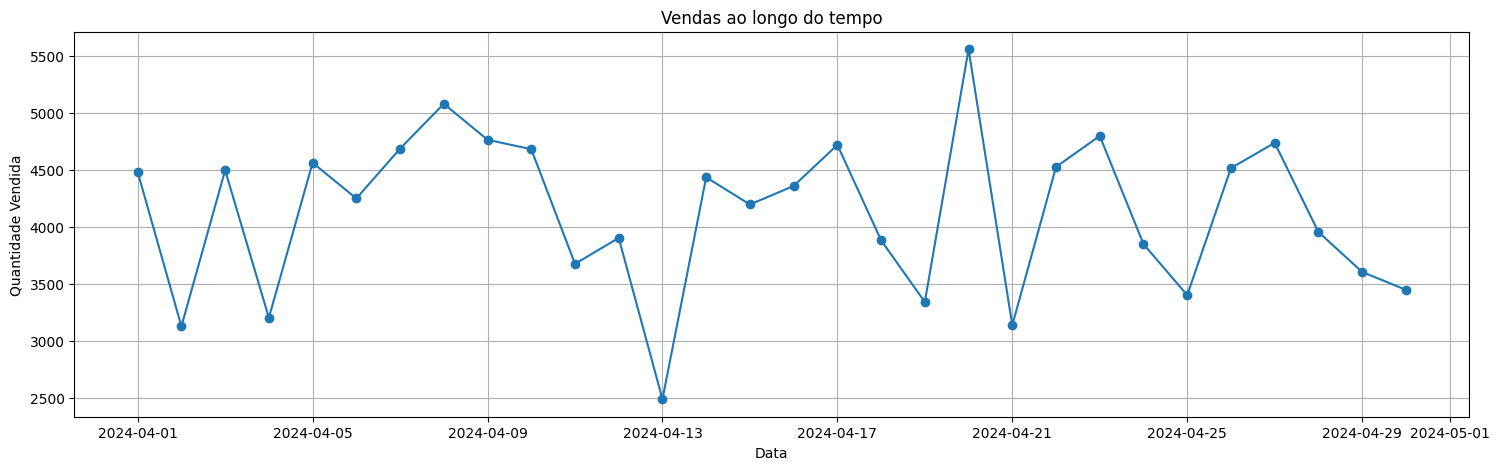

Análise de desempenho de produtos:
nome
Produto 1       5287
Produto 100    21312
Produto 101    21779
Produto 102     5221
Produto 103    17784
               ...  
Produto 93     12962
Produto 95     17746
Produto 96      5352
Produto 98     25691
Produto 99     10002
Name: valor_total, Length: 468, dtype: int64


In [2]:
# Importando a biblioteca pandas como pd e a biblioteca matplotlib.pyplot como plt
import pandas as pd
import matplotlib.pyplot as plt

# Lendo um arquivo CSV chamado 'data_warehouse.csv' em um DataFrame df_warehouse
df_warehouse = pd.read_csv('data_warehouse.csv')

# Agrupando o DataFrame por nome do produto e calculando a soma de 'quantidade' e 'valor_total' para cada produto
vendas_por_produto = df_warehouse.groupby('nome')[['quantidade', 'valor_total']].sum()

# Imprimindo a análise de vendas por produto
print("Análise de vendas por produto:")
print(vendas_por_produto)

# Agrupando o DataFrame por categoria do produto e calculando a soma de 'quantidade' e 'valor_total' para cada categoria
vendas_por_categoria = df_warehouse.groupby('categoria')[['quantidade', 'valor_total']].sum()

# Imprimindo a análise de vendas por categoria de produto
print("Análise de vendas por categoria de produto:")
print(vendas_por_categoria)

# Convertendo a coluna 'data' para o formato datetime
df_warehouse['data'] = pd.to_datetime(df_warehouse['data'])

# Agrupando o DataFrame por data e calculando a soma de 'quantidade' e 'valor_total' para cada data
vendas_por_data = df_warehouse.groupby('data')[['quantidade', 'valor_total']].sum()

# Imprimindo a análise de tendências temporais
print("Análise de tendências temporais:")
print(vendas_por_data)

# Criando um gráfico de vendas ao longo do tempo
plt.figure(figsize=(18, 5))
plt.plot(vendas_por_data.index, vendas_por_data['quantidade'], marker='o', linestyle='-')
plt.title('Vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.show()

# Agrupando o DataFrame por nome do produto e calculando a soma de 'valor_total' para cada produto
desempenho_produto = df_warehouse.groupby('nome')['valor_total'].sum()

# Imprimindo a análise de desempenho de produtos
print("Análise de desempenho de produtos:")
print(desempenho_produto)

In [38]:
from sqlalchemy import create_engine
import pandas as pd
import os

# Criar uma conexão com o banco de dados SQLite
conn_string = 'sqlite:///data_lake.db'
engine = create_engine(conn_string)

# Verifica se o diretório 'data_lake' existe; se não, cria o diretório
if not os.path.exists('data_lake'):
    os.makedirs('data_lake')

# Define o número de arquivos a serem criados e o número de linhas por arquivo
num_files = 10
num_rows_per_file = 1000

# Loop para gerar dados aleatórios e salvar em CSV
for i in range(1, num_files + 1):
    # Gera dados aleatórios para cada arquivo
    data = {
        'coluna1': np.random.randint(0, 100, num_rows_per_file),
        'coluna2': np.random.randn(num_rows_per_file),
        'coluna3': np.random.choice(['A', 'B', 'C'], num_rows_per_file)
    }

    # Cria um DataFrame com os dados gerados
    df = pd.DataFrame(data)

    # Salva o DataFrame em um arquivo CSV no diretório 'data_lake' e adiciona ao banco de dados
    file_name = f'data_lake/dados_{i}.csv'
    df.to_csv(file_name, index=False)
    table_name = file_name.split('/')[-1].split('.')[0]
    df.to_sql(table_name, engine, if_exists='replace', index=False)

    # Imprime os primeiros registros do DataFrame salvo no arquivo CSV
    print(f"\nDados do arquivo {file_name}:\n")
    print(df.head())

engine.dispose()




Dados do arquivo data_lake/dados_1.csv:

   coluna1   coluna2 coluna3
0       36 -0.850930       B
1       23  0.663848       A
2       65 -0.409982       B
3       21 -0.664039       C
4       46  1.602240       A

Dados do arquivo data_lake/dados_2.csv:

   coluna1   coluna2 coluna3
0       65 -1.641306       C
1       96  1.176724       C
2       56 -0.025505       A
3       32  0.286589       A
4       80 -0.285180       C

Dados do arquivo data_lake/dados_3.csv:

   coluna1   coluna2 coluna3
0       68 -0.336542       B
1        8  0.481189       C
2       30  0.346354       C
3       99 -2.741681       B
4       82  0.170835       C

Dados do arquivo data_lake/dados_4.csv:

   coluna1   coluna2 coluna3
0        9 -0.030650       C
1       27 -0.934136       B
2       11 -1.072819       C
3       51  0.667221       C
4       88  1.829420       B

Dados do arquivo data_lake/dados_5.csv:

   coluna1   coluna2 coluna3
0       68 -0.484277       A
1       93 -0.141504       C
2      

Primeiras linhas do DataFrame:
   coluna1   coluna2 coluna3
0       36 -0.850930       B
1       23  0.663848       A
2       65 -0.409982       B
3       21 -0.664039       C
4       46  1.602240       A

Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coluna1  1000 non-null   int64  
 1   coluna2  1000 non-null   float64
 2   coluna3  1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB
None

Resumo estatístico do DataFrame:
           coluna1      coluna2
count  1000.000000  1000.000000
mean     49.586000    -0.018642
std      28.395685     0.967084
min       0.000000    -3.212106
25%      26.000000    -0.683080
50%      50.000000    -0.049802
75%      73.000000     0.627997
max      99.000000     3.014833


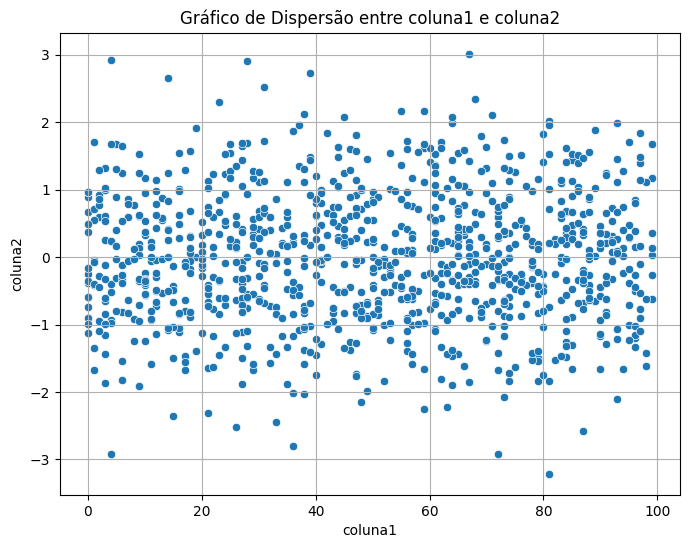

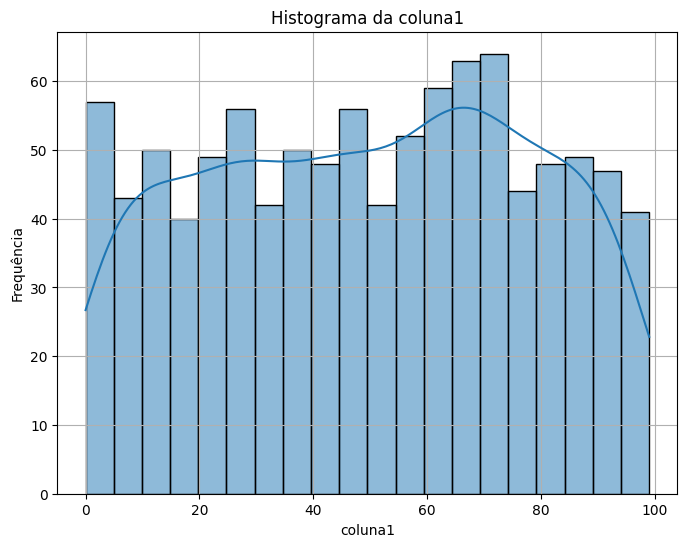

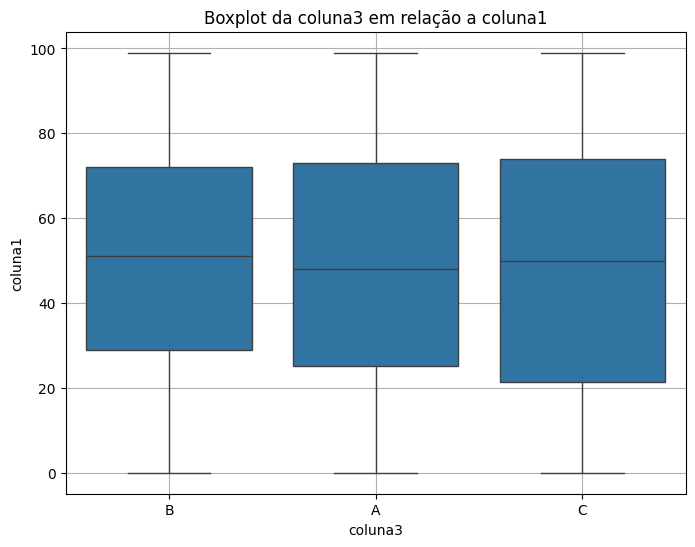

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Criar uma conexão com o banco de dados SQLite
conn_string = 'sqlite:///data_lake.db'
engine = create_engine(conn_string)

# Carregar dados do banco de dados para um DataFrame
table_name = 'dados_1'
df = pd.read_sql_table(table_name, engine)

# Imprimir as primeiras linhas do DataFrame
print("Primeiras linhas do DataFrame:")
print(df.head())

# Imprimir informações sobre o DataFrame, incluindo tipo de dados e memória usada
print("\nInformações sobre o DataFrame:")
print(df.info())

# Imprimir um resumo estatístico do DataFrame, incluindo média, desvio padrão, mínimo, máximo, etc.
print("\nResumo estatístico do DataFrame:")
print(df.describe())

# Criar um gráfico de dispersão usando as colunas 'coluna1' e 'coluna2' do DataFrame
plt.figure(figsize=(8,6))
sns.scatterplot(x='coluna1', y='coluna2', data=df)
plt.title("Gráfico de Dispersão entre coluna1 e coluna2")
plt.xlabel('coluna1')
plt.ylabel('coluna2')
plt.grid(True)
plt.show()

# Criar um histograma da coluna 'coluna1' com 20 bins e KDE (Kernel Density Estimation)
plt.figure(figsize=(8,6))
sns.histplot(df['coluna1'], bins=20, kde=True)
plt.title('Histograma da coluna1')
plt.xlabel('coluna1')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Criar um boxplot da coluna 'coluna3' em relação à coluna 'coluna1'
plt.figure(figsize=(8,6))
sns.boxplot(x='coluna3', y='coluna1', data=df)
plt.title('Boxplot da coluna3 em relação a coluna1')
plt.xlabel('coluna3')
plt.ylabel('coluna1')
plt.grid(True)
plt.show()
